# Sensor - Camera

In this notebook we will learn how to use the camera component to retrieve frames from a Duckiebot.

In [1]:
%load_ext autoreload
%autoreload 1

import os

import numpy as np
import cv2
import matplotlib.pyplot as plt


# TODO: change this to the name of your Duckiebot
VEHICLE_NAME: str = "db21j3"

INFO:ControlSocket:Establishing link to CONTROL connector at tcp://172.17.0.1:7501...
INFO:DataSocket[robot]:Establishing link to DATA IN connector for group 'robot' at tcp://172.17.0.1:34429...
INFO:DataSocket[robot]:Link to DATA IN connector for group 'robot' established at tcp://172.17.0.1:34429.
INFO:DataSocket[robot]:Establishing link to DATA OUT connector for group 'robot' at tcp://172.17.0.1:45191...
INFO:DataSocket[robot]:Link to DATA OUT connector for group 'robot' established at tcp://172.17.0.1:45191.
INFO:ControlSocket:Establishing link to CONTROL connector at tcp://172.17.0.1:7501...
INFO:DataSocket[layer]:Establishing link to DATA OUT connector for group 'layer' at tcp://172.17.0.1:41811...
INFO:DataSocket[layer]:Link to DATA OUT connector for group 'layer' established at tcp://172.17.0.1:41811.


Using Duckiematrix...


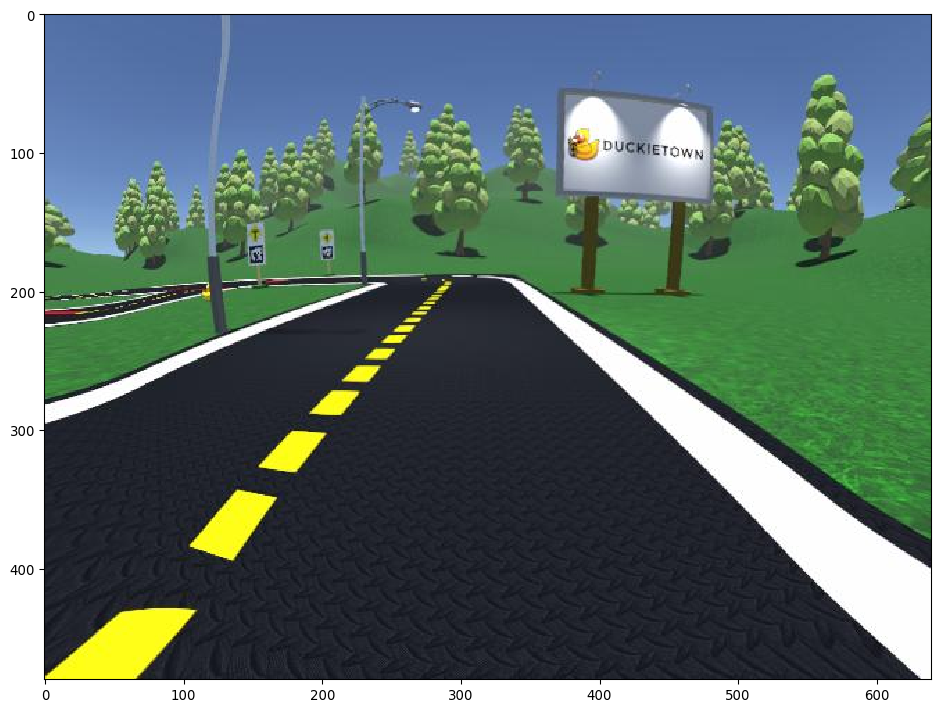

In [4]:
# Sensor - Camera - Capture single frame

from duckietown.components.duckiebot import CameraDriverComponent

# make figure
fig = plt.figure(figsize=(16, 9), dpi=96)

# define component
camera: CameraDriverComponent = CameraDriverComponent(vehicle_name=VEHICLE_NAME)
camera.start()

# wait for next frame
bgr: np.ndarray = camera.out_bgr.get()

# render frame
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

# stop component
camera.stop()

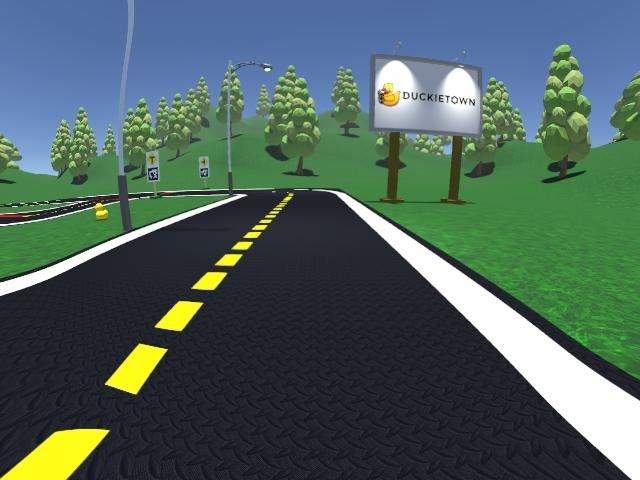

Using Duckiematrix...


In [5]:
# Sensor - Camera - Live Feed

import cv2
import numpy as np
from IPython.display import display, Image

from duckietown.components.duckiebot import CameraDriverComponent

# make figure
figure: display = display(Image(data=b""), display_id=True)

# define component
camera: CameraDriverComponent = CameraDriverComponent(vehicle_name=VEHICLE_NAME)
camera.start()

# consume frames
try:
    while True:
        bgr: np.ndarray = camera.out_bgr.get()
        # bgr -> jpeg
        _, jpg = cv2.imencode('.jpeg', bgr)
        # render frame
        figure.update(Image(data=jpg.tobytes()))
except KeyboardInterrupt:
    pass
finally:
    # stop component
    camera.stop()


Using Duckiematrix...


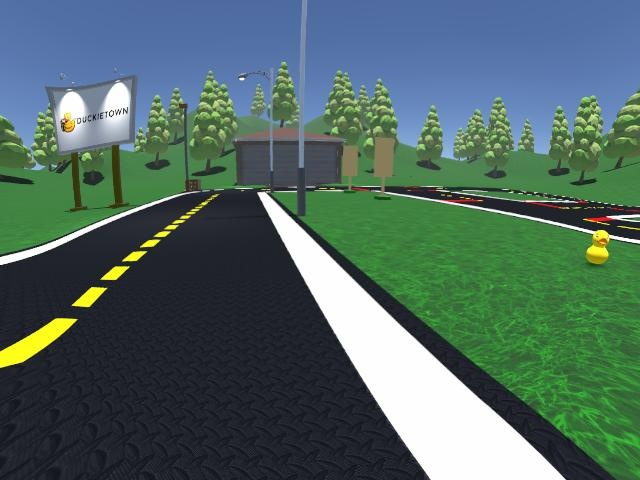

In [6]:
# Sensor - Camera - Live Feed using a Renderer Component

import cv2
import numpy as np
from IPython.display import display, Image

from duckietown.components.duckiebot import CameraDriverComponent
from duckietown.components.rendering import ImageRendererComponent

# define components
camera: CameraDriverComponent = CameraDriverComponent(vehicle_name=VEHICLE_NAME)
renderer: ImageRendererComponent = ImageRendererComponent()

# connect components
renderer.in_image.wants(camera.out_bgr)

# start components
camera.start()
renderer.start()

# wait until the cell is stopped
renderer.join()

# stop components
camera.stop()
renderer.stop()